# Google Data Analytics Professional Certificate Capstone Project
___

<div style="width:100%;text-align: center;"> 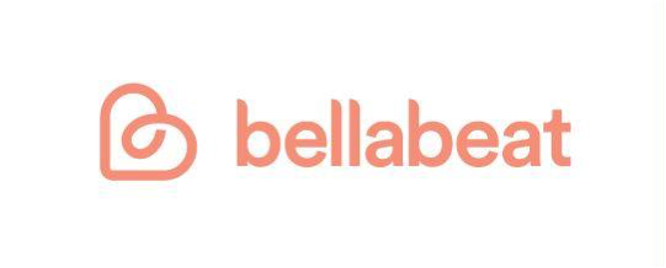 </div>


# 1. Ask

### Bellabeat: How Can A Wellness Technology Company Play It Smart?¶

Bellabeat, a successful small company with potential for global growth in the smart device market, aims to leverage smart device fitness data to uncover new opportunities. Urška Sršen, cofounder and Chief Creative Officer, believes that analyzing consumer usage data from one of Bellabeat’s products can provide valuable insights to drive marketing strategy. 

Business Task: 
* **Analyze consumer usage data**: Focus on one of Bellabeat's products and analyze smart device fitness data to gain insights into how consumers are using that specific device.
* **Identify growth opportunities:** Use the insights from the data analysis to identify potential areas for growth or improvement for the company.
* **Guide marketing strategy:** Develop high-level marketing recommendations based on your analysis to help shape Bellabeat's overall marketing strategy.
* **Present your findings:** Summarize the insights and recommendations.

Business Objectives
1. What are some trends in smart device usage? 
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help influence Bellabeat marketing strategy? 

Key Stakeholders:
1. **Urška Sršen (Cofounder and Chief Creative Officer)**
2. **Sando Mur (Cofounder and Mathematician)** 
3. **Bellabeat Marketing Analytics Team**

___

# 2. Prepare

## Data Source: 
1. Data is publicly available [here](https://www.kaggle.com/datasets/arashnic/fitbit/data)
2. Generated by respondents to a distributed survey via Amazon Mechanical Turk between 12th March 2016 to 12th May 2016
3. Thirty eligible Fitbit users consented to the submission of personal tracker data
4. Data included minute-level output for physical activity, heart rate, and sleep monitoring
5. Data is stored in long format

## Is the data **ROCCC - Reliable, Original, Comprehensive, Current, Cited**
- Reliable - Data is from a small sample size of 30 responses to a survey.
- Original - Data is from a third party (Amazon Mechanical Turk)
- Comprehensive - Data recorded inludes physical activity, heart rate and sleep monitoring. Though the sample size is small.
- Current - Data is several years old and not relevant to today
- Cited - Data is collected from a third party sources

## Data Set Observations:
- Limited in size, only 30 users
- The Fitbit Data set contains 18 files, for this capstone project we will primarily concentrate on `dailyActivities_merged.csv`

___

# 3. Process

In [1]:
# Importing requires libraries
import warnings
warnings.filterwarnings('ignore')
# Pandas and numpty for dataset/array manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Seaborn and Matplotlib for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset
df_activity = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

## Basic Data Exploration

In [3]:
# return the first 5 rows of data from the dataset
df_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
# Information about the Dataframe including index dtype and columns, non-null value
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
# Count the number of unique entries (expect 30)
unique_users = len(pd.unique(df_activity['Id']))
print("Num of unique users: ", unique_users)

Num of unique users:  33



The summary above provides us with some key information that will come in use later on: 
- There are 940 entries with 15 columns of data cross the whole data set
- There doesnt seem to be any null-values 
- We can see the Datatype for each column
    - one thing to note is that ActivityDate is currently an object Dtype, we can change that later on
- We can see that there are a total of 33 unique users, not 30 as we intitially stated.  

## Data Cleaning


We will begin with converting the ActivityDate from an Object Dtype to a DateTime Dtype

In [6]:
# Convert the ActivityDate to a DateTime
df_activity['ActivityDate'] = pd.to_datetime(df_activity['ActivityDate'])

# Print out the first 3 values from the dataset
df_activity.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776


In [7]:
# Next we will create a new column that contains the day of the week that the activity took place.
# We can do this by using the `day_name()` method

df_activity['DayOfTheWeek'] = df_activity['ActivityDate'].dt.day_name()

In [8]:
# Create two columns to track total time across all activity in both minutes and hours

df_activity['TotalMinutes'] = df_activity['VeryActiveMinutes'] + df_activity['FairlyActiveMinutes'] + df_activity['LightlyActiveMinutes'] + df_activity['SedentaryMinutes']

df_activity['TotalHours'] = np.round(df_activity['TotalMinutes'] / 60)

df_activity.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,TotalMinutes,TotalHours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094,18.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033,17.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1440,24.0


___

# 4. Analyze

In [9]:
# Generate descriptive statistics of the dataset
df_activity.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283


On average, users recorded 7,637 steps, which is equivalent to 5.4 kilometers. However, this falls short of the recommended amount. According to the CDC, adults should aim for at least 10,000 steps or 8 kilometers per day to achieve general health benefits, support weight loss, and enhance fitness levels. [Source](https://www.cdc.gov/pcd/issues/2016/pdf/16_0111.pdf)

The majority of users are classified as sedentary, averaging 991 minutes of inactivity or 20 hours daily, accounting for 81% of their total time.

The average number of calories burned was 2,303, which is roughly equal to 0.6 pounds of body weight. However, interpreting this data in detail is challenging because the number of calories burned is influenced by various factors, including age, weight, daily activities, exercise routines, hormonal balance, and daily calorie intake.

___

# 5. Share

### A look at the average number of steps taking for each day of the week

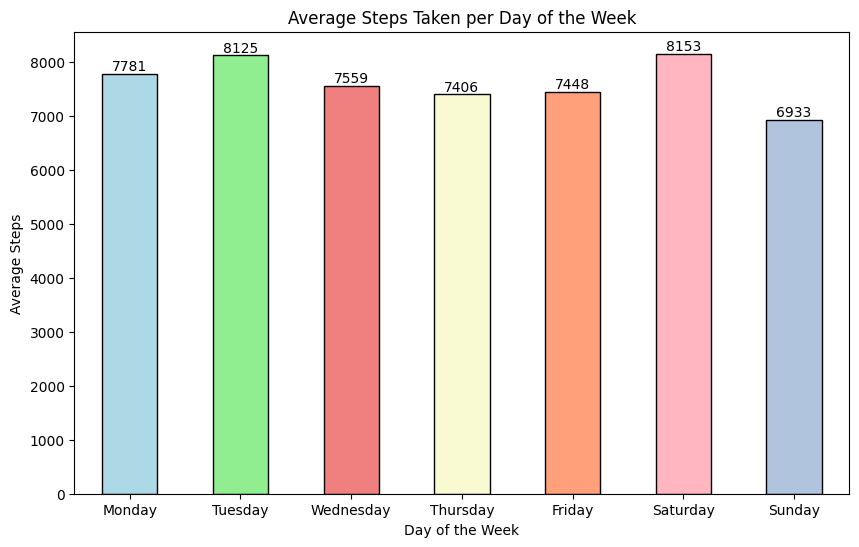

In [10]:
df_activity['DayOfTheWeek'] = pd.Categorical(df_activity['DayOfTheWeek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
avg_steps_per_day = df_activity.groupby('DayOfTheWeek')['TotalSteps'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

colors = {
    'Monday': 'lightblue',
    'Tuesday': 'lightgreen',
    'Wednesday': 'lightcoral',
    'Thursday': 'lightgoldenrodyellow',
    'Friday': 'lightsalmon',
    'Saturday': 'lightpink',
    'Sunday': 'lightsteelblue'
}

# Map the colors to the days of the week
bar_colors = [colors[day] for day in avg_steps_per_day.index]

plt.figure(figsize=(10, 6))
bars = avg_steps_per_day.plot(kind='bar', color=bar_colors, edgecolor='black')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

plt.xlabel('Day of the Week')
plt.ylabel('Average Steps')
plt.title('Average Steps Taken per Day of the Week')
plt.xticks(rotation=0)
plt.show()

Based on the graph above:
- Saturday has the highest average steps (8,153 steps). This suggests that users are most active on Saturdays.
- Sunday has the lowest average steps (6,933 steps). This indicates that users are least active on Sundays.
- Tuesday and Saturday are the two days with the highest average steps, suggesting a possible pattern where users are more active on these days. Thursday has the lowest average steps among the weekdays, indicating a potential mid-week drop in activity.
- On average, users seem to take more steps on weekends (Saturday) compared to weekdays, with the exception of Sunday. This might reflect increased leisure or recreational activities on weekends.

### A look at the number of times users logged in during the week

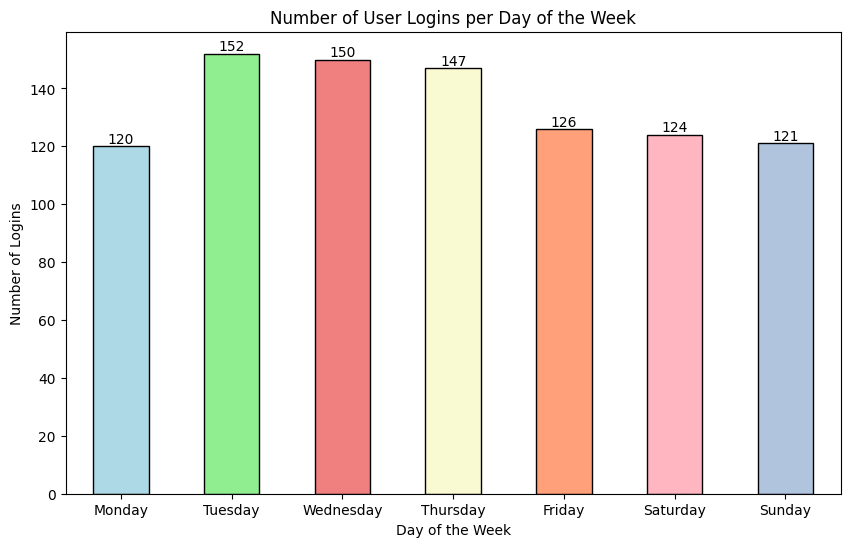

In [11]:
login_counts = df_activity['DayOfTheWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
bars = login_counts.plot(kind='bar', color=bar_colors, edgecolor='black')

# Annotate bars with their actual value
for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Logins')
plt.title('Number of User Logins per Day of the Week')
plt.xticks(rotation=0)
plt.show()

Based on the graph above:

- Tuesday has the highest average logins (152). This indicates that users are most engaged on Tuesdays.
- Monday has the lowest average logins (120). This suggests that user engagement is lowest at the start of the week.
- Tuesday, Wednesday, and Thursday show higher average logins compared to the rest of the week. This might indicate higher engagement or activity during the middle of the week. 
    - Saturday and Sunday show lower average logins compared to weekdays, potentially reflecting reduced engagement over the weekend.
- Weekdays generally have higher average logins compared to weekends. This trend might be due to work-related activities or routines that drive higher login frequency during the weekdays.

### A look at the amount of calories burnt vs the amount of steps

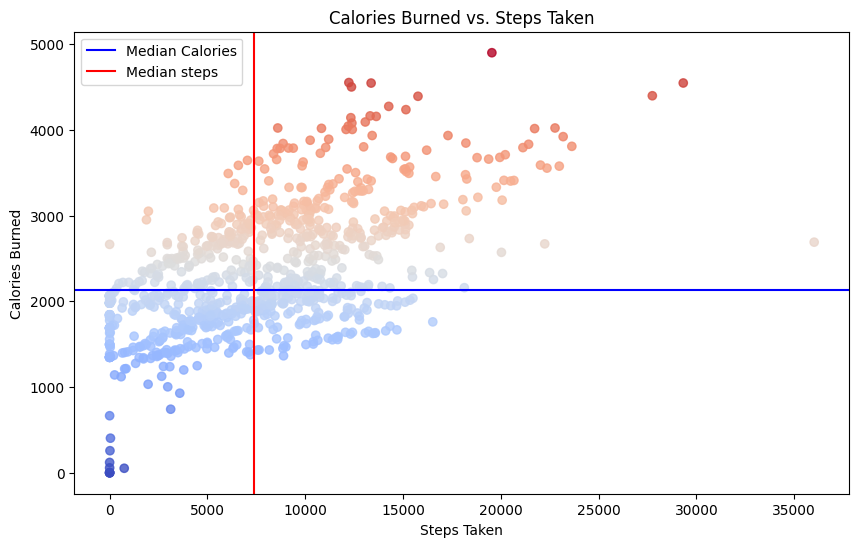

In [12]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df_activity.TotalSteps, df_activity.Calories, 
            alpha = 0.8, c = df_activity.Calories, 
            cmap = "coolwarm") 

medianSteps =  7405
medianCalories = 2134

plt.axhline(medianCalories, color = 'blue', label = "Median Calories")
plt.axvline(medianSteps, color = 'red', label = "Median steps")

plt.xlabel('Steps Taken')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs. Steps Taken')
plt.legend()
plt.show()

Based on the graph above:

- We can see there is a positive correlation between steps taken and the amount of calories burnt
- We can see we have a few outliers
    - zero steps with zero calories burnt
    - two observations that are greater than 25000 steps and over 4000 calories

### A look at the average minutes spent based on activity type

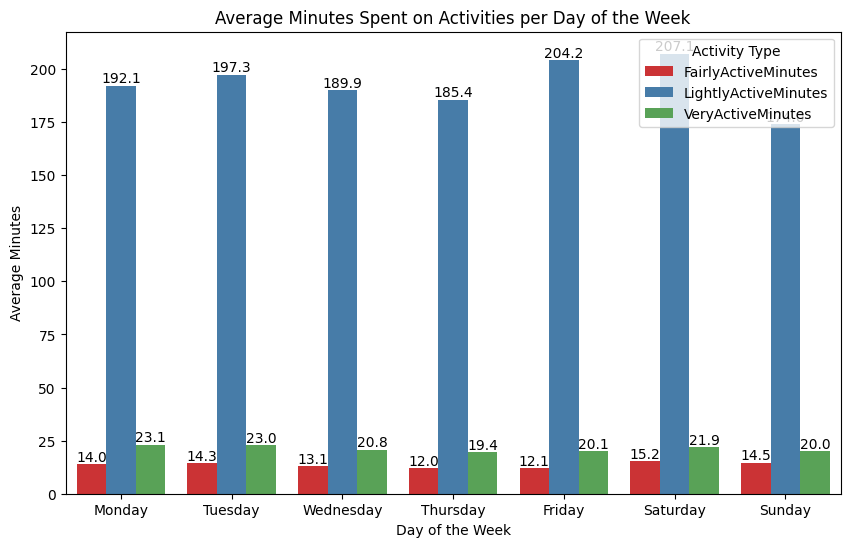

In [13]:
df_melted = df_activity.melt(id_vars=['DayOfTheWeek'], value_vars=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'], 
                     var_name='ActivityType', value_name='Minutes')

# Calculate the average minutes per day of the week and activity type
df_avg = df_melted.groupby(['DayOfTheWeek', 'ActivityType'])['Minutes'].mean().reset_index()

# Reorder days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_avg['DayOfTheWeek'] = pd.Categorical(df_avg['DayOfTheWeek'], categories=ordered_days, ordered=True)
df_avg = df_avg.sort_values('DayOfTheWeek')

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='DayOfTheWeek', y='Minutes', hue='ActivityType', data=df_avg, palette='Set1')

for p in bar_plot.patches:
    # Get the height of each bar
    height = p.get_height()
    # Add text above each bar
    bar_plot.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}', ha='center', va='bottom')


plt.xlabel('Day of the Week')
plt.ylabel('Average Minutes')
plt.title('Average Minutes Spent on Activities per Day of the Week')
plt.xticks(rotation=0)
plt.legend(title='Activity Type')
plt.show()

Based on the graph above:
- we can see that the majority of the time was spent being lightly active, that could entail anything from casual walking to light weight training


### Percentage of Activity 

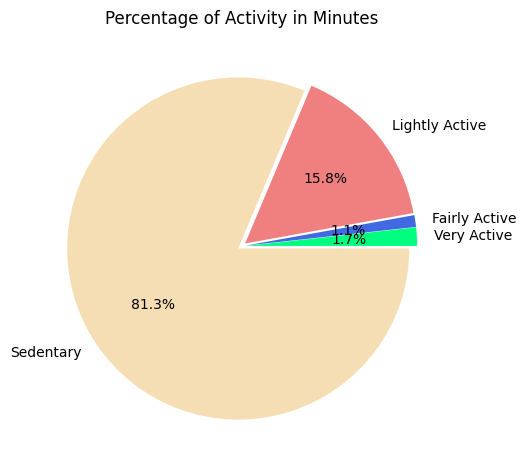

In [14]:
VeryActiveMinutes = df_activity['VeryActiveMinutes'].sum()
FairlyActiveMinutes = df_activity['FairlyActiveMinutes'].sum()
LightlyActiveMinutes = df_activity['LightlyActiveMinutes'].sum()
SedentaryMinutes = df_activity['SedentaryMinutes'].sum()

slices = [VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes]
labels= ["Very Active", "Fairly Active", "Lightly Active", "Sedentary"]
colours = ['springgreen', 'royalblue', 'lightcoral', 'wheat']
explode = [0.025, 0.025, 0.025, 0.025]
plt.style.use("default")
plt.pie(slices, labels = labels, colors = colours, explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

From the above pie chart we can see:
- Sedentary activities take up 81.3% of the chart
    - this could be an indication of their job or lifestyle, pershaps they work jobs that require them to be sitting at a desk for the majority of the day.
- A small percentage of activities are being tracked, 1.1% for Fairly Active and 1.7% for Very Active


### Correlation Matrix

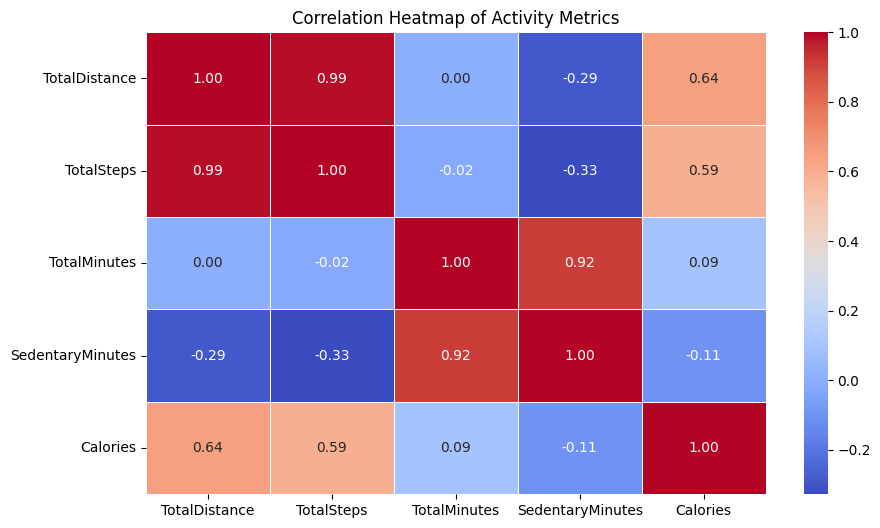

In [15]:
corr1 = df_activity[['TotalDistance', 'TotalSteps', 'TotalMinutes', 'SedentaryMinutes', 'Calories']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap of Activity Metrics')
plt.show()

Based on the heatmap above:
- TotalDistance vs. TotalSteps: An extremely strong positive correlation of 0.99 suggests that as the total distance increases, the total steps also tend to increase.
- TotalMinutes vs. SedentaryMinutes: A high correlation of 0.92 suggests that a lot of the time spent by users was sedentary, this could be due to their occuation or lifestyle. 
- Calories vs. TotalDistance: A positive correlation of 0.64 shows that as the total distance increases, the number of calories burned tends to increase.

___


# 6. ACT

Now that we're done with your analysis we can look back at our initial business objectives:
1. What are some trends in smart device usage?
    - We noted that the majority of users (81%) were tracking sedentary activities, this could be an indication of their job or lifestyle, pershaps they work jobs that require them to be sitting at a desk for the majority of the day. 
    - We found that Saturday and Sunday show lower average logins compared to Tuesday and Wednesday.
    - The data also revealed that many people were unable reach the minimum 10,000 steps per day recommended for healthy adults


2. How could these trends apply to Bellabeat customers and influence Bellabeat marketing strategy??

There are a number of ways that the trends could influence Bellabeat's marketing strategy by providing actionable insights into user behavior and preferences.
- Encourage Consistent Use
    - highlight consistent use through marketing materials, emphasize how tracking can lead to better insights into health
    - send daily notifications to 'get up & move' or to complete a specific goal that the user as set
- Optimise Timing for User Engagement
    - Send timely notifications at specific peak times, such as "begin your workout" if they havent yet. 
- Sleep Reminders
    - Implement notifications that remind the user to 'wind down for sleep' 
- Address Inactivity
    - Produce explainer videos and blogs about the health risks of a sedentary lifestyle and ways to overcome it.

By applying these trends to customer interactions, Bellabeat can create a more personalized and engaging experience. This approach not only helps users achieve their fitness goals but also fosters a stronger connection between the users and the product. Tailoring marketing strategies and product features to these insights ensures that Bellabeat meets user needs more effectively and enhances overall customer satisfaction and retention.

## References
1. CDC Preventing Chronic Disease https://www.cdc.gov/pcd/issues/2016/pdf/16_0111.pdf